<h2>1. Import Library yang dibutuhkan</h2>
terdiri dari library utama, proses preprocessing, model, visualisasi, dan evaluasi

In [15]:
# Import library utama
import pandas as pd
import numpy as np
import seaborn as sns

# Library untuk preprocessing dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Library untuk algoritma Naive Bayes dan Decision Tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text

# Visualisasi jika diperlukan (untuk Decision Tree)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# library evauasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import pickle

<h2>2. Baca dataset</h2>

In [2]:
data = pd.read_excel('dataset.xlsx') 
data.head()

,no,nim,nama,Jenis Kelamin,Umur,Kelas,tahun masuk,IPS1,IPS2,IPS3,IPS4,IPS5,status
0,1,T3114001,FADLI RADJO,Laki-laki,33,Reguler Pagi,2014,0.00,0.00,0.00,0.00,0.0,DROP OUT
1,2,T3114002,IRNA S RATA,Perempuan,29,Reguler Sore,2014,0.52,0.00,0.00,0.00,0.0,DROP OUT
2,3,T3114003,HIJRAH,Laki-laki,35,Reguler Sore,2014,3.78,0.83,0.00,0.00,0.0,DROP OUT
3,4,T3114004,NELSON MABUIA,Laki-laki,29,Reguler Sore,2014,3.52,3.50,3.75,3.24,2.8,LULUS
4,5,T3114005,ARYA PUTRA PRATAMA,Laki-laki,31,Reguler Sore,2014,0.52,0.00,0.00,0.00,0.0,DROP OUT


<h2>3. Menghilangkan data yang tidak dibutuhkan</h2>
Analisa atribut yang dibutuhkan pada proses model naive bayes dan decision Tree

In [3]:
data_cleaned = data.drop(columns=['no', 'nim', 'nama', 'tahun masuk'])
data_cleaned.head()

,Jenis Kelamin,Umur,Kelas,IPS1,IPS2,IPS3,IPS4,IPS5,status
0,Laki-laki,33,Reguler Pagi,0.00,0.00,0.00,0.00,0.0,DROP OUT
1,Perempuan,29,Reguler Sore,0.52,0.00,0.00,0.00,0.0,DROP OUT
2,Laki-laki,35,Reguler Sore,3.78,0.83,0.00,0.00,0.0,DROP OUT
3,Laki-laki,29,Reguler Sore,3.52,3.50,3.75,3.24,2.8,LULUS
4,Laki-laki,31,Reguler Sore,0.52,0.00,0.00,0.00,0.0,DROP OUT


<h2>4. Cek Missing Value pada dataset</h2>

In [4]:
# Cek missing values pada dataset
missing_values = data_cleaned.isnull().sum()

# Menampilkan pesan terkait missing values
if missing_values.sum() > 0:
    print("Terdapat missing values pada dataset:")
    print(missing_values[missing_values > 0])
else:
    print("Tidak ada missing values pada dataset.")

Tidak ada missing values pada dataset.


<h2>5. PreProcess - Jika ada missing values</h2>
<h3>Lakukan Imputasi data</h3>
asumsinya semua data penting, maka lakukan pendekatan untuk mempertahankan data tersebut dengan cara: <br>
jika variabel tersebut numerik gunakan pendekatan rata-rata (mean)<br>
jika variabel tersebut kategorikal gunakan pendekatan modus (kata yang paling sering digunakan)

In [5]:
# Menangani missing values numerik dengan mean
data_cleaned['IPS5'].fillna(data_cleaned['IPS5'].mean(), inplace=True)

# Menangani missing values kategorikal dengan modus
data_cleaned['Kelas'].fillna(data_cleaned['Kelas'].mode()[0], inplace=True)

# Validasi setelah penanganan
if data.isnull().sum().sum() == 0:
    print("Semua missing values telah ditangani.")
else:
    print("Masih terdapat missing values.")

Semua missing values telah ditangani.


/var/folders/76/77vg_8pd6lxdyyr41q8txn0w0000gn/T/ipykernel_54251/1656799686.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['IPS5'].fillna(data_cleaned['IPS5'].mean(), inplace=True)
/var/folders/76/77vg_8pd6lxdyyr41q8txn0w0000gn/T/ipykernel_54251/1656799686.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

<h2>6. Pre-Process - Encoding Data Kategorikal</h2>
Ubah jenis kelamin, kelas, dan kelas target menjadi angka menggunakan encoding <br>
contoh: Laki-laki: 0; Perempuan:1

In [6]:
label_encoders = {}
for column in ['Jenis Kelamin', 'Kelas', 'status']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

data_cleaned.head()

,Jenis Kelamin,Umur,Kelas,IPS1,IPS2,IPS3,IPS4,IPS5,status
0,0,33,0,0.00,0.00,0.00,0.00,0.0,0
1,1,29,1,0.52,0.00,0.00,0.00,0.0,0
2,0,35,1,3.78,0.83,0.00,0.00,0.0,0
3,0,29,1,3.52,3.50,3.75,3.24,2.8,1
4,0,31,1,0.52,0.00,0.00,0.00,0.0,0


<h2>7. Filter kelas target: DROP OUT dan LULUS, target yang lain di hilangkan</h2>

In [7]:
# Memfilter dataset agar hanya menggunakan kelas target 'DROP OUT' dan 'LULUS'
data_filtered = data_cleaned[data_cleaned['status'].isin([0, 1])]  # 0 dan 1 sesuai encoding untuk 'DROP OUT' dan 'LULUS'

<h2>8. Pisahkan fitur dan target</h2>

In [8]:
# Memisahkan fitur dan target
X = data_filtered.drop(columns=['status'])
y = data_filtered['status']

<h2>9. Perbarui kelas target menjadi 2 kelas saja</h2>

In [9]:
# Memperbarui kelas target untuk mencerminkan kelas yang digunakan
target_classes = ['DROP OUT', 'LULUS']

In [10]:
# Menampilkan jumlah data setelah penyaringan
print("Jumlah data setelah filtering:")
print(y.value_counts())
print("\nJumlah atribut yang digunakan:", X.shape[1])
print("Kelas target yang digunakan:", target_classes)

Jumlah data setelah filtering:
status
1    682
0    516
Name: count, dtype: int64

Jumlah atribut yang digunakan: 8
Kelas target yang digunakan: ['DROP OUT', 'LULUS']


<h2>10. Bagi dataset menjadi data latih dan uji, skenario yang digunakan adalah 80:20</h2>

In [11]:
# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Model Naive Bayes (pelatihan model)</h1>
proses:<br>
X_train: Dataset fitur untuk pelatihan (atribut input)<br>
y_train: Target kelas untuk pelatihan.<br>

**proses:**
1. **Menghitung Probabilitas Prior ($P(C)$)**:
   - Probabilitas prior setiap kelas dihitung berdasarkan distribusi data dalam `y_train`.
   - Rumus:
     $$
     P(C) = \frac{\text{Jumlah sampel dalam kelas } C}{\text{Total sampel}}
     $$

2. **Menghitung Parameter Distribusi Gaussian**:
   - Untuk setiap kelas ($C$) dan setiap fitur ($x_i$):
     - **Mean ($\mu$)**: Rata-rata nilai fitur $x_i$ untuk kelas $C$.
       $$
       \mu = \frac{1}{N} \sum_{j=1}^{N} x_{ij}
       $$
     - **Variansi ($\sigma^2$)**: Variansi nilai fitur $x_i$ untuk kelas $C$.
       $$
       \sigma^2 = \frac{1}{N} \sum_{j=1}^{N} (x_{ij} - \mu)^2
       $$

   - Parameter ini disimpan dalam atribut model:
     - `theta_`: Mean ($\mu$).
     - `var_`: Variansi ($\sigma^2$).

3. **Menghitung Probabilitas Likelihood ($P(x|C)$)**:
   - Likelihood dihitung menggunakan distribusi Gaussian:
     $$
     P(x_i|C) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
     $$
   - Ini dilakukan secara efisien menggunakan logaritma untuk menghindari masalah numerik, tetapi tetap dihitung sampai proses prediksi.


In [12]:
# Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

<h2>Uji Model naive bayes yang telah di latih menggunakan salah satu data</h2>
Ketika diberikan data baru, model akan menghitung probabilitas posterior untuk setiap kelas menggunakan rumus:
$$
P(C|X) \propto P(X|C) \cdot P(C)
$$

Prediksi akan dilakukan dengan memilih kelas dengan probabilitas posterior tertinggi.


In [13]:
# Mengambil probabilitas prior (P(C)) dari model
priors = nb_model.class_prior_

# Mean dan variansi dari fitur untuk setiap kelas
means = nb_model.theta_  # Mean fitur per kelas
variances = nb_model.var_  # Variansi fitur per kelas

# Ambil data satu sampel dari X_test untuk proses prediksi manual
sample = X_test.iloc[0].values  # Ambil satu baris (sampel)

# Hitung P(X|C) untuk setiap kelas
likelihoods = []
for idx, cls in enumerate(nb_model.classes_):  # Iterasi per kelas
    likelihood = -0.5 * np.sum(np.log(2 * np.pi * variances[idx]))  # Log normalizer
    likelihood -= 0.5 * np.sum(((sample - means[idx]) ** 2) / variances[idx])  # Log likelihood
    likelihoods.append(likelihood)

# Hitung log posterior P(C|X) = log(P(C)) + log(P(X|C))
log_posteriors = np.log(priors) + likelihoods

# Probabilitas prediksi (normalisasi log posterior)
probabilities = np.exp(log_posteriors - np.max(log_posteriors))  # Stabilkan perhitungan
probabilities /= np.sum(probabilities)

# Prediksi kelas berdasarkan probabilitas maksimum
predicted_class = nb_model.classes_[np.argmax(probabilities)]

# Menampilkan hasil
print("Proses Prediksi Naive Bayes:")
print(f"Sampel fitur: {sample}")
print(f"Prior (P(C)): {priors}")
print(f"Mean per kelas: {means}")
print(f"Variansi per kelas: {variances}")
print(f"Likelihoods (log P(X|C)): {likelihoods}")
print(f"Log posteriors (log P(C|X)): {log_posteriors}")
print(f"Probabilitas prediksi (P(C|X)): {probabilities}")
print(f"Prediksi kelas: {predicted_class}")

Proses Prediksi Naive Bayes:
Sampel fitur: [ 0.   18.    1.    3.78  3.54  3.04  2.58  3.7 ]
Prior (P(C)): [0.42693111 0.57306889]
Mean per kelas: [[ 0.28117359 28.7408313   0.60880196  2.39271394  1.82168704  1.37217604
   1.03535452  0.86809291]
 [ 0.43169399 28.7431694   0.4845173   3.37384335  3.50162113  3.35786885
   3.25816029  3.25364299]]
Variansi per kelas: [[ 0.20211501  7.58075335  0.23816214  1.88148482  2.39019105  2.21239063
   1.91830068  1.74294063]
 [ 0.2453343  10.9194661   0.2497603   0.5866295   0.18920521  0.25123937
   0.31289043  0.35284503]]
Likelihoods (log P(X|C)): [-21.405935808015272, -11.818408253032585]
Log posteriors (log P(C|X)): [-22.25706843 -12.37515759]
Probabilitas prediksi (P(C|X)): [5.10879485e-05 9.99948912e-01]
Prediksi kelas: 1


<h2>Evaluasi Naive Bayes</h2>

Naive Bayes Accuracy: 0.8666666666666667


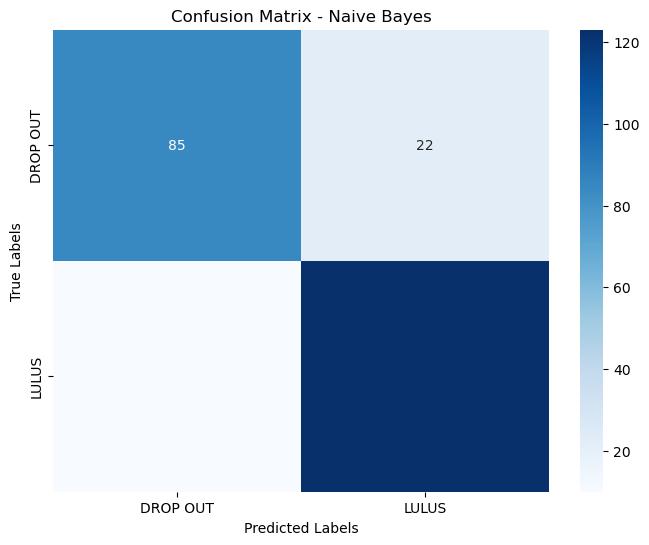

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       107
           1       0.85      0.92      0.88       133

    accuracy                           0.87       240
   macro avg       0.87      0.86      0.86       240
weighted avg       0.87      0.87      0.87       240

Naive Bayes AUC Score: 0.9290281779214391


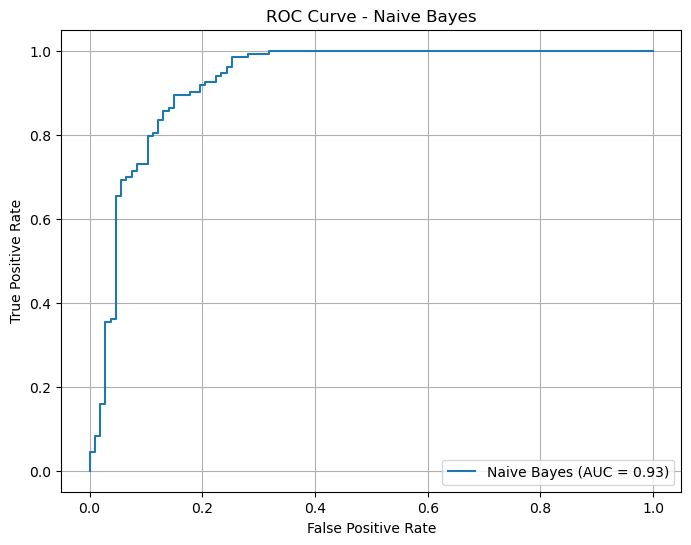

In [16]:
# Prediksi dengan Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["DROP OUT", "LULUS"], yticklabels=["DROP OUT", "LULUS"])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
class_report_nb = classification_report(y_test, y_pred_nb, zero_division=1)  # Handle undefined metrics
print("Naive Bayes Classification Report:\n", class_report_nb)

# ROC AUC untuk dua kelas
try:
    if len(nb_model.classes_) == 2:  # Jika hanya ada dua kelas
        # Gunakan probabilitas kelas positif untuk ROC AUC
        y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
        fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb, pos_label=1)
        auc_score_nb = roc_auc_score(y_test, y_prob_nb)
        print("Naive Bayes AUC Score:", auc_score_nb)

        # Plot ROC Curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_score_nb:.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve - Naive Bayes")
        plt.legend()
        plt.grid()
        plt.show()
    else:  # Jika lebih dari dua kelas
        y_prob_nb = nb_model.predict_proba(X_test)  # Probabilitas semua kelas
        auc_score_nb = roc_auc_score(y_test, y_prob_nb, multi_class='ovr')  # Multi-class ROC AUC
        print("Naive Bayes AUC Score (multi-class):", auc_score_nb)

except ValueError as e:
    print(f"ROC AUC Error: {e}")


<h1>Simpan model pelatihan Naive Bayes</h1>

In [17]:
# Simpan model Naive Bayes yang sudah dilatih ke dalam file
model_filename = "naive_bayes_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(nb_model, model_file)

print(f"Model Naive Bayes telah disimpan sebagai '{model_filename}'.")

# Load model Naive Bayes dari file
with open(model_filename, 'rb') as model_file:
    loaded_nb_model = pickle.load(model_file)

# Implementasi: Prediksi menggunakan model yang sudah disimpan
y_pred_loaded_model = loaded_nb_model.predict(X_test)

# Evaluasi akurasi model yang dimuat ulang
accuracy_loaded_model = accuracy_score(y_test, y_pred_loaded_model)
print(f"Akurasi model yang dimuat ulang: {accuracy_loaded_model}")

Model Naive Bayes telah disimpan sebagai 'naive_bayes_model.pkl'.
Akurasi model yang dimuat ulang: 0.8666666666666667


# Decision Tree
### Input:
- `X_train`: Fitur data latih (atribut).
- `y_train`: Target data latih (kelas target).

### Proses:

1. **Membangun Struktur Decision Tree**:
   - Model memulai dari akar (*root*) dan membagi data secara rekursif untuk membuat cabang (*branches*) berdasarkan aturan tertentu.
   - Setiap pembagian (*split*) dilakukan pada fitur yang memaksimalkan penurunan impurity.
   - Kriteria pembagian ditentukan oleh parameter `criterion` (default adalah `gini` untuk Gini Impurity, bisa juga `entropy`).
2. **Menghitung Impurity (Gini atau Entropy)**:
   - **Gini Impurity**: Mengukur ketidakseimbangan kelas pada sebuah node.
     $$
     Gini = 1 - \sum_{i=1}^{n} (p_i)^2
     $$
     Di mana $p_i$ adalah probabilitas kelas $i$ pada node tersebut.

   - **Entropy**: Mengukur ketidakpastian kelas.
     $$
     Entropy = - \sum_{i=1}^{n} p_i \log_2 (p_i)
     $$
     Node yang lebih "murni" memiliki nilai entropy atau Gini lebih rendah.

3. **Memilih Fitur untuk Split**:
   - Setiap fitur diuji untuk melihat mana yang menghasilkan impurity terendah setelah pembagian.
   - Model memilih fitur dengan informasi paling relevan untuk membagi data.

4. **Rekursi**:
   - Setelah split pertama, model melanjutkan proses untuk setiap cabang hingga mencapai salah satu dari kondisi berikut:
     - Semua data pada node memiliki kelas yang sama (*pure node*).
     - Tidak ada lagi fitur yang tersedia untuk split.
     - Kondisi pemberhentian tertentu tercapai (misalnya, maksimal kedalaman `max_depth` atau jumlah sampel minimum di node `min_samples_split`).

In [18]:
# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Uji Model Decision Tree menggunakan salah satu data uji

In [19]:
# Ambil satu sampel dari data uji
single_sample = X_test.iloc[0].values.reshape(1, -1)  # Pastikan data dalam bentuk array 2D

# Prediksi kelas untuk satu sampel
predicted_class = dt_model.predict(single_sample)[0]  # Prediksi kelas
predicted_probabilities = dt_model.predict_proba(single_sample)  # Probabilitas kelas

# Menampilkan hasil prediksi
print("Data Uji (Single Sample):", single_sample)
print("Prediksi Kelas:", predicted_class)
print("Probabilitas Kelas:", predicted_probabilities)
print("Kelas yang Mungkin:", dt_model.classes_)

Data Uji (Single Sample): [[ 0.   18.    1.    3.78  3.54  3.04  2.58  3.7 ]]
Prediksi Kelas: 0
Probabilitas Kelas: [[1. 0.]]
Kelas yang Mungkin: [0 1]


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi model decision tree

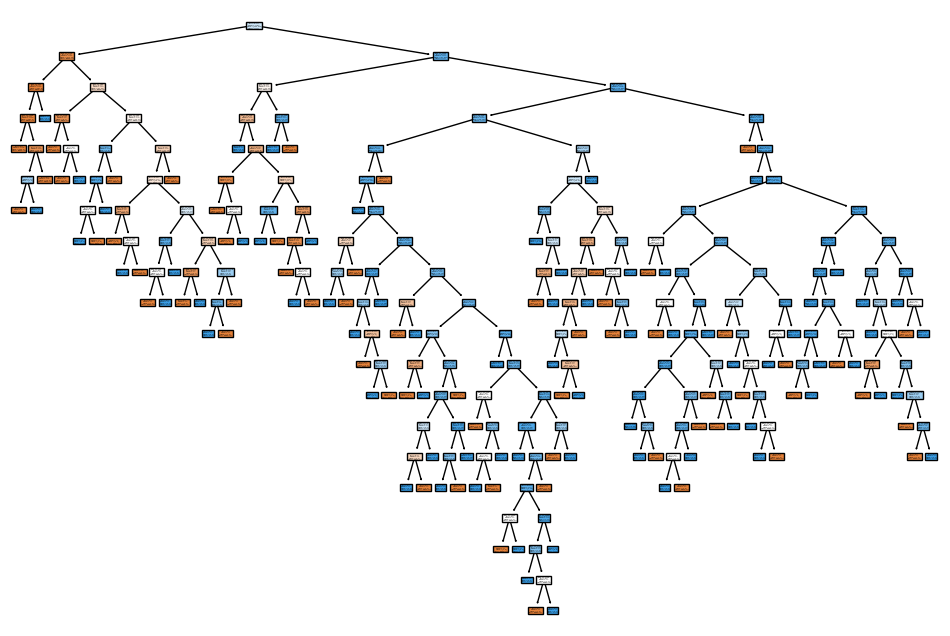

|--- IPS5 <= 2.16
|   |--- IPS5 <= 0.75
|   |   |--- IPS4 <= 3.94
|   |   |   |--- IPS4 <= 2.37
|   |   |   |   |--- class: 0
|   |   |   |--- IPS4 >  2.37
|   |   |   |   |--- IPS2 <= 2.66
|   |   |   |   |   |--- IPS2 <= 2.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- IPS2 >  2.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- IPS2 >  2.66
|   |   |   |   |   |--- class: 0
|   |   |--- IPS4 >  3.94
|   |   |   |--- class: 1
|   |--- IPS5 >  0.75
|   |   |--- IPS3 <= 1.84
|   |   |   |--- IPS2 <= 3.11
|   |   |   |   |--- class: 0
|   |   |   |--- IPS2 >  3.11
|   |   |   |   |--- IPS1 <= 3.13
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- IPS1 >  3.13
|   |   |   |   |   |--- class: 1
|   |   |--- IPS3 >  1.84
|   |   |   |--- IPS3 <= 2.55
|   |   |   |   |--- IPS1 <= 3.50
|   |   |   |   |   |--- IPS2 <= 2.35
|   |   |   |   |   |   |--- IPS2 <= 2.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- IPS2 >  2.02
|   |   | 

In [20]:
# Visualisasi decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model,
    feature_names=X.columns.tolist(),  # Convert Index to list
    class_names=[str(cls) for cls in label_encoders['status'].classes_],  # Ensure class names are strings
    filled=True
)
plt.show()

# Alternatif teks
tree_rules = export_text(dt_model, feature_names=X.columns.tolist())
print(tree_rules)

# Evaluasi model Decision Tree

Decision Tree Accuracy: 0.8166666666666667


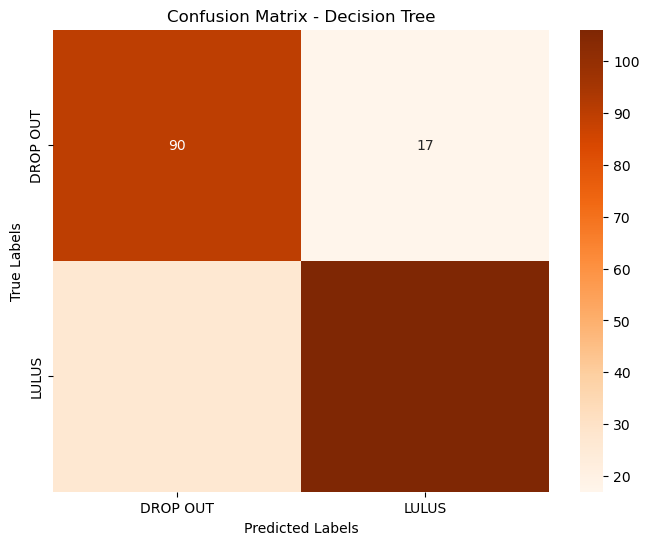

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       107
           1       0.86      0.80      0.83       133

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

Decision Tree AUC Score: 0.8190569882650551


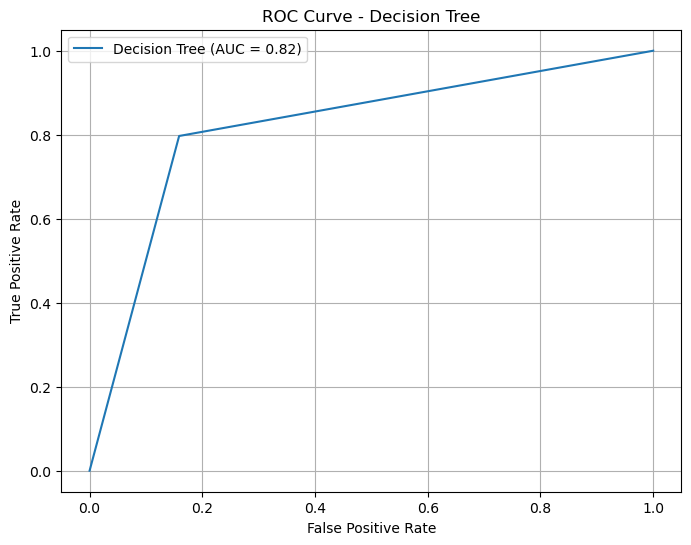

In [21]:
# Akurasi dan evaluasi
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Buat Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=["DROP OUT", "LULUS"], yticklabels=["DROP OUT", "LULUS"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=1)
print("Decision Tree Classification Report:\n", class_report_dt)

# ROC AUC untuk binary classification
try:
    if len(dt_model.classes_) == 2:  # Binary classification
        # Probabilitas kelas positif
        y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
        fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=1)
        auc_score_dt = roc_auc_score(y_test, y_prob_dt)
        print("Decision Tree AUC Score:", auc_score_dt)

        # Plot ROC Curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_score_dt:.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve - Decision Tree")
        plt.legend()
        plt.grid()
        plt.show()

    else:  # Multi-class classification
        y_prob_dt = dt_model.predict_proba(X_test)
        auc_score_dt = roc_auc_score(y_test, y_prob_dt, multi_class='ovr')
        print("Decision Tree AUC Score (multi-class):", auc_score_dt)

except ValueError as e:
    print(f"ROC AUC Error: {e}")

# Simpan Model Decision Tree yang telah dilatih

In [22]:
# Simpan model Decision Tree yang telah dilatih
dt_model_filename = "decision_tree_model.pkl"
with open(dt_model_filename, 'wb') as model_file:
    pickle.dump(dt_model, model_file)

print(f"Model Decision Tree telah disimpan sebagai '{dt_model_filename}'.")

Model Decision Tree telah disimpan sebagai 'decision_tree_model.pkl'.


In [23]:
# Muat model Decision Tree yang telah disimpan
with open(dt_model_filename, 'rb') as model_file:
    loaded_dt_model = pickle.load(model_file)

# Uji model yang dimuat
y_pred_loaded_dt = loaded_dt_model.predict(X_test)

# Evaluasi model
accuracy_loaded_dt = accuracy_score(y_test, y_pred_loaded_dt)
conf_matrix_loaded_dt = confusion_matrix(y_test, y_pred_loaded_dt)
class_report_loaded_dt = classification_report(y_test, y_pred_loaded_dt, zero_division=1)

# Tampilkan hasil evaluasi
print("Akurasi model yang dimuat ulang:", accuracy_loaded_dt)
print("\nConfusion Matrix:")
print(conf_matrix_loaded_dt)
print("\nClassification Report:")
print(class_report_loaded_dt)

Akurasi model yang dimuat ulang: 0.8166666666666667

Confusion Matrix:
[[ 90  17]
 [ 27 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       107
           1       0.86      0.80      0.83       133

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240



In [24]:
# Ambil satu sampel dari data uji
single_sample_test = X_test.iloc[0].values.reshape(1, -1)  # Data dalam bentuk 2D

# Prediksi kelas menggunakan model yang dimuat
predicted_class_single = loaded_dt_model.predict(single_sample_test)[0]
predicted_probabilities_single = loaded_dt_model.predict_proba(single_sample_test)

# Tampilkan hasil prediksi
print("Data Uji (Single Sample):", single_sample_test)
print("Prediksi Kelas:", predicted_class_single)
print("Probabilitas Kelas:", predicted_probabilities_single)
print("Kelas yang Mungkin:", loaded_dt_model.classes_)


Data Uji (Single Sample): [[ 0.   18.    1.    3.78  3.54  3.04  2.58  3.7 ]]
Prediksi Kelas: 0
Probabilitas Kelas: [[1. 0.]]
Kelas yang Mungkin: [0 1]


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
